# Predição de Despesas Médicas do Seguro de Saúde

Este conjunto de dados *insurance.csv* representa despesas médicas de indivíduos nos EUA.<br/>
Predizer despesas médicas é de fundamental importância para uma empresa de seguros de saúde. É tambem de interesse de cada pessoa.

#### Vamos realizar uma analise exploratória dos dados (EDA) utilizado o Seaborn

- age: idade do beneficiário primário.
- sex: empreiteiro de seguros gênero feminino, masculino.
- bmi: Índice de massa corporal (IMC),  a relação entre altura e peso é dada por (kg / m ^ 2), idealmente o valor deve ficar entre 18,5 a 24,9.
- children: Número de dependentes / Número de crianças cobertas pelo seguro de saúde.
- smoker: A pessoa é fumante ou não.
- region: a área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste e noroeste.
- expenses: custos médicos individuais faturados pelo seguro de saúde.

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

In [51]:
data = pd.read_csv('insurance.csv')

In [52]:
data.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

### Qual o número de fumantes e não fumantes?

In [53]:
data.groupby('smoker').count()

age   sex   bmi  children  region  expenses
smoker                                              
no      1064  1064  1064      1064    1064      1064
yes      274   274   274       274     274       274

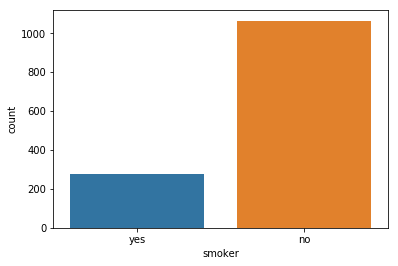

In [54]:
#Fumantes vs total
sns.countplot(x='smoker',data=data)

### Há mais homens ou mulheres?

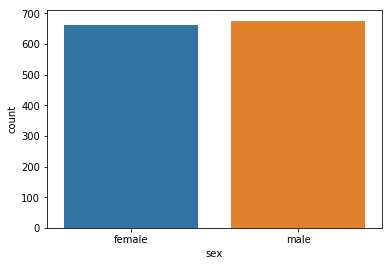

In [55]:
sns.countplot(x='sex',data=data)

### E se fizermos distinção de gênero considerando os fumantes? Haverá mais homens que fumam ou mulheres fumantes?

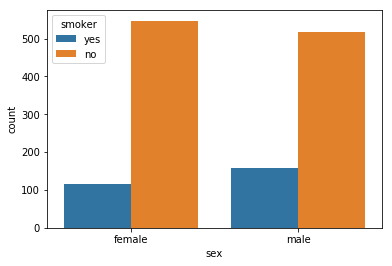

In [56]:
sns.countplot(x='sex', hue='smoker', data=data)

### Como os dados da idade se distribuem? E os gastos?

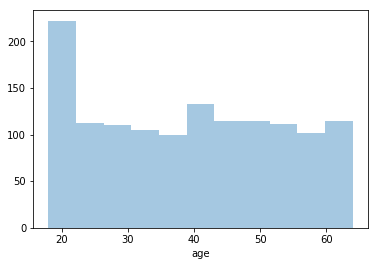

In [57]:
sns.distplot(data['age'], kde = False);

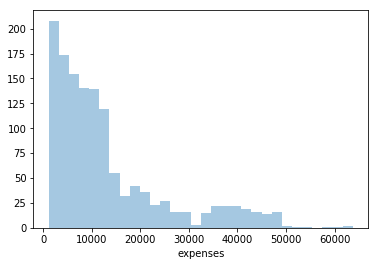

In [58]:
sns.distplot(data['expenses'], kde = False);

### Quem gasta mais com o plano de saúde? Fumantes ou não fumantes?

In [59]:
new_data = data.groupby('smoker').sum()

In [60]:
new_data.reset_index()

smoker    age      bmi  children    expenses
0     no  41906  32615.0      1160  8974061.63
1    yes  10553   8415.4       305  8781763.56

- Valor total

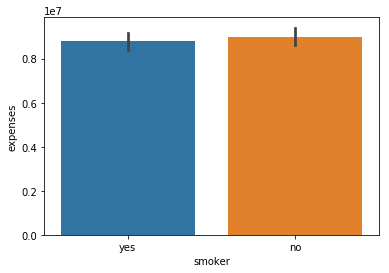

In [61]:
sns.barplot(x="smoker", y="expenses", data=data, estimator=np.sum)

- Valor médio

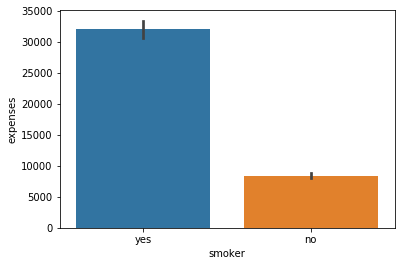

In [62]:
sns.barplot(x="smoker", y="expenses", data=data, estimator=np.mean)

### Quem gasta mais com o plano de saúde? Homens ou Mulheres?

- Valor total

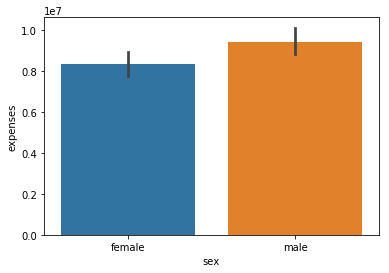

In [63]:
sns.barplot(x="sex", y="expenses", data=data, estimator=np.sum)

- Valor médio

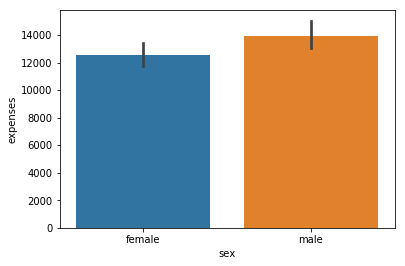

In [64]:
sns.barplot(x="sex", y="expenses", data=data, estimator=np.mean)

### E se considerarmos homens e mulheres, mas fazendo a distinção entre fumantes e não fumantes?

- Valor total

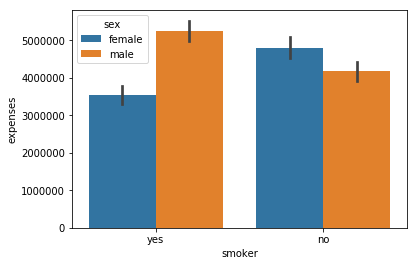

In [65]:
sns.barplot(x="smoker", y="expenses", hue="sex", data=data, estimator=np.sum)

- Valor médio

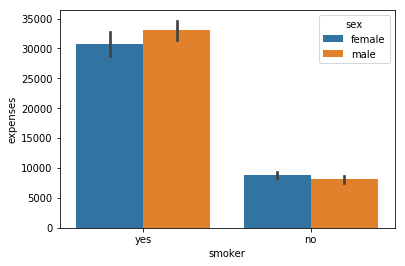

In [66]:
sns.barplot(x="smoker", y="expenses", hue="sex", data=data, estimator=np.mean)

### O boxplot ajuda bastante a termos mais informações sobre os dados

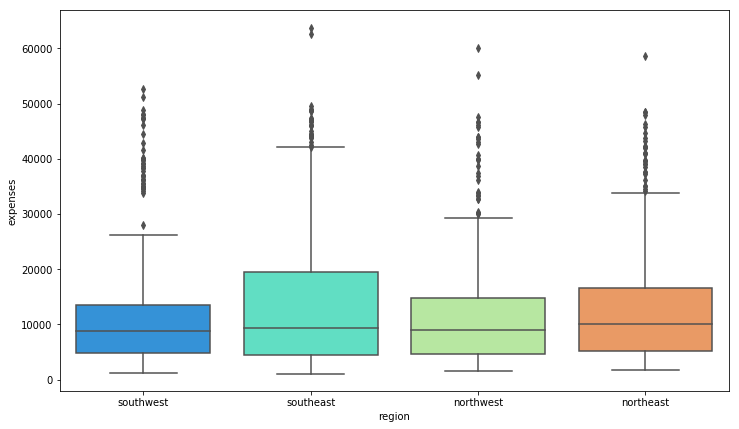

In [70]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='region',y='expenses', data=data, palette='rainbow')

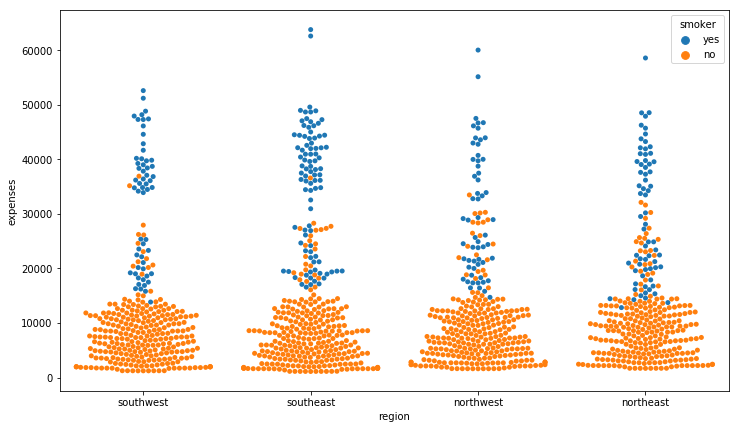

In [71]:
'''
    Mostra uma melhor representação da distribuição de valores, mas não se adapta bem a um grande número de observações. 
    Este estilo de gráfico é às vezes chamado de "beeswarm".
'''
plt.figure(figsize=(12, 7))
sns.swarmplot(x='region',y='expenses', hue="smoker", data=data)

### Vamos verificar algumas correlações ...

In [72]:
data.corr()

age       bmi  children  expenses
age       1.000000  0.109341  0.042469  0.299008
bmi       0.109341  1.000000  0.012645  0.198576
children  0.042469  0.012645  1.000000  0.067998
expenses  0.299008  0.198576  0.067998  1.000000

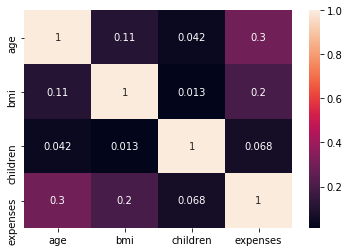

In [73]:
sns.heatmap(data.corr(), annot = True)

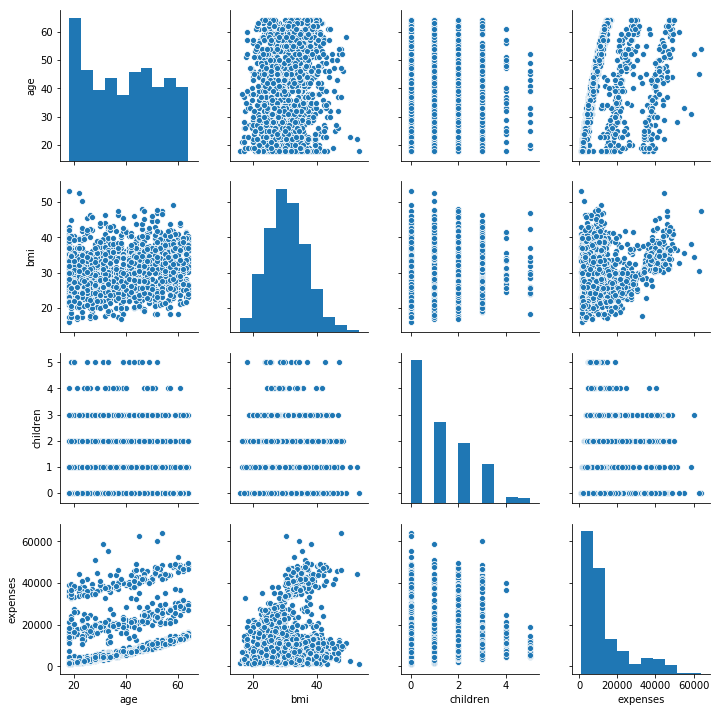

In [74]:
sns.pairplot(data)

### Qual a relação dos gastos com o IMC fazendo distinção dos fumantes?

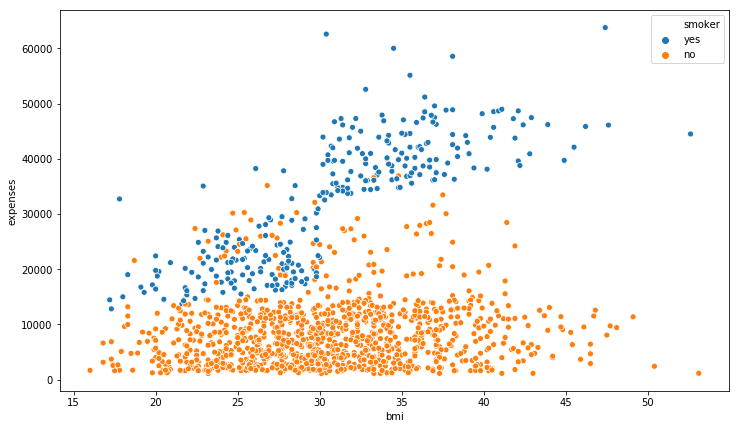

In [75]:
# relação entre a variável x e y
plt.figure(figsize=(12, 7))
sns.scatterplot(x="bmi", y="expenses", hue="smoker", data=data) 

### Qual a relação dos gastos com a idade fazendo distinção dos fumantes?

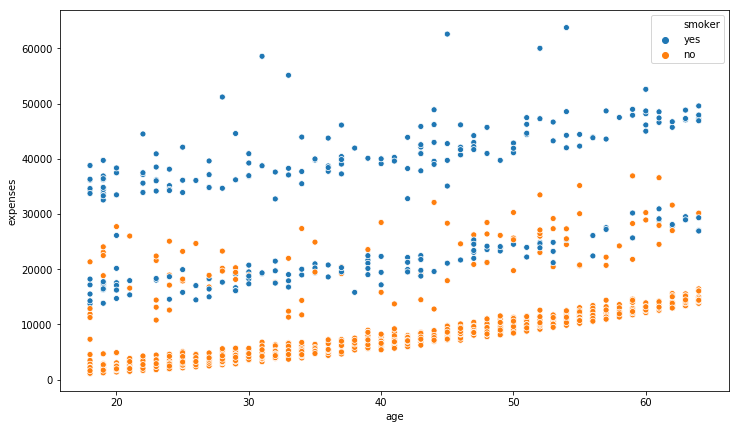

In [26]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x="age", y="expenses", hue="smoker", data=data)

### Referência

- https://seaborn.pydata.org/examples/index.html